# Laboratory Exercice 3 | Linear Regression

**Name:** `JARANILLA, Yul Jhon O.`

___

**Instructor:** Jhun Brian M. Andam

**Course Code:** IT325

*IT3R9 and IT3R10*

### 🤖 Import Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 🔃 Load Dataset

Instructions:
Use this <a href="https://drive.google.com/file/d/1adgUWWnv8N-fZVFIGGfSHlcdlrBT4bWz/view?usp=drive_link">dataset</a> and perform linear regression (simple linear or multiple linear regression) to predict the price.

In [2]:
data_path = 'dataset/kc_house_data.csv'
house_data = pd.read_csv(data_path)
house_data


FileNotFoundError: [Errno 2] No such file or directory: 'kc_house_data.csv'

In [ ]:
missing_values = house_data.isnull().sum()

missing_values[missing_values > 0]
missing_values


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
X = house_data[features]
y = house_data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the prices on the testing set
y_pred = model.predict(X_test)

# Calculating the model performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mse, rmse, r2


(74240588612.02202, 272471.26199293387, 0.5089151794366076)

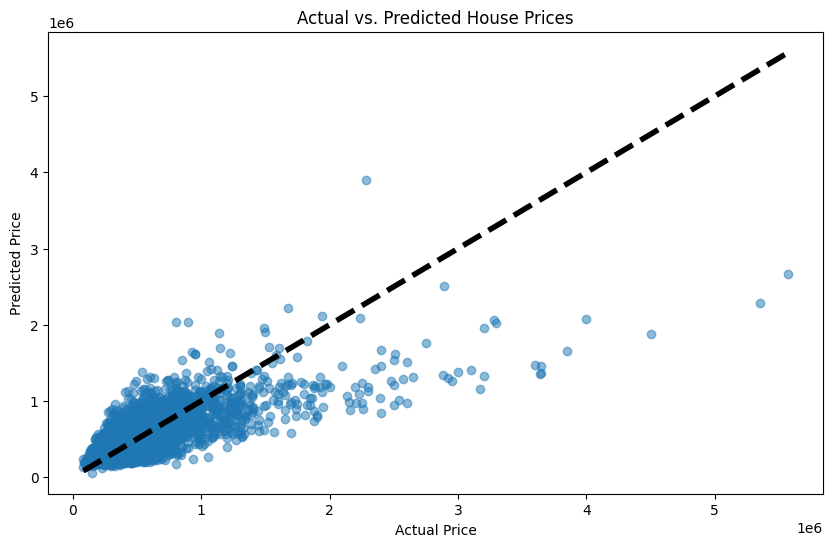

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()


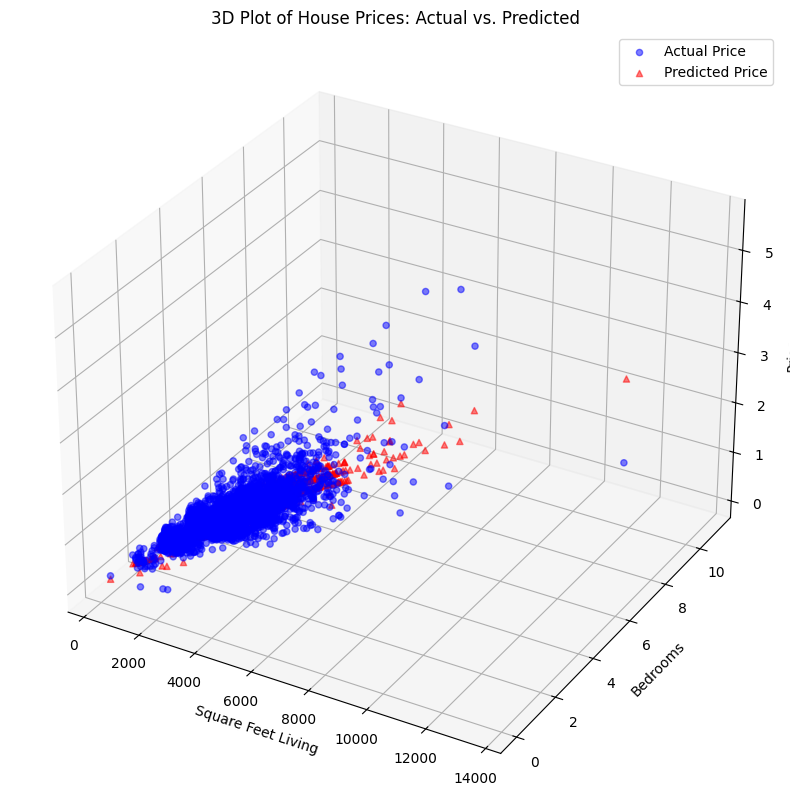

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['sqft_living'], X_test['bedrooms'], y_test, c='blue', marker='o', alpha=0.5, label='Actual Price')
ax.scatter(X_test['sqft_living'], X_test['bedrooms'], y_pred, c='red', marker='^', alpha=0.5, label='Predicted Price')

ax.set_xlabel('Square Feet Living')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.legend()
ax.set_title('3D Plot of House Prices: Actual vs. Predicted')

plt.show()
